# Online Learning Platform Student Performance Analytics

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.8.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached scikit_learn-1.8.0-cp313-cp313-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)

   ---------------------------------------- 0/4 [contourpy]
   ---------------------------------------- 0/4 [contourpy]
   ---------------------------------------- 0/4 [contourpy]
   ---------- ----------------------------- 1/4 [scikit-learn]
   ---------- ----------------------------- 1/4 [scikit-learn]
   ---------- ----------------------------- 1/4 [scikit-learn]
   ---------- ----------------------------- 1/4 [scikit-learn]
   ---------- ---------

In [2]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Load Data
students = pd.read_csv('../data/students.csv')
engagement = pd.read_csv('../data/engagement.csv')
assessments = pd.read_csv('../data/assessments.csv')


In [4]:
#Merge Data
df = students.merge(engagement, on='student_id')
df = df.merge(assessments, on='student_id')
df.head()


,student_id,age,gender,course_id,dropout,login_days,video_hours,forum_posts,attendance,avg_score,assignments_submitted
0,S1000,24,F,C03,1,25,11,6,60,67,11
1,S1001,21,F,C03,1,1,63,5,63,47,7
2,S1002,28,F,C01,0,17,21,8,68,88,11
3,S1003,25,F,C03,0,17,52,19,96,41,8
4,S1004,22,M,C04,0,3,55,0,37,48,11


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   student_id             500 non-null    str  
 1   age                    500 non-null    int64
 2   gender                 500 non-null    str  
 3   course_id              500 non-null    str  
 4   dropout                500 non-null    int64
 5   login_days             500 non-null    int64
 6   video_hours            500 non-null    int64
 7   forum_posts            500 non-null    int64
 8   attendance             500 non-null    int64
 9   avg_score              500 non-null    int64
 10  assignments_submitted  500 non-null    int64
dtypes: int64(8), str(3)
memory usage: 43.1 KB


In [6]:
df.describe()

,age,dropout,login_days,video_hours,forum_posts,attendance,avg_score,assignments_submitted
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,23.504000,0.280000,14.424000,37.656000,9.434000,65.196000,68.388000,6.022000
std,3.543317,0.449449,8.482224,22.406199,5.792128,20.088022,18.784226,3.117845
min,18.000000,0.000000,1.000000,1.000000,0.000000,30.000000,35.000000,1.000000
25%,20.000000,0.000000,7.000000,19.000000,4.000000,47.750000,53.000000,3.000000
50%,24.000000,0.000000,14.000000,36.000000,10.000000,65.000000,69.000000,6.000000
75%,27.000000,1.000000,22.000000,57.250000,14.000000,83.000000,84.000000,8.250000
max,29.000000,1.000000,29.000000,79.000000,19.000000,99.000000,99.000000,11.000000


In [7]:
df.isnull().sum()

student_id               0
age                      0
gender                   0
course_id                0
dropout                  0
login_days               0
video_hours              0
forum_posts              0
attendance               0
avg_score                0
assignments_submitted    0
dtype: int64

In [8]:
df.count

<bound method DataFrame.count of     student_id  age gender course_id  dropout  login_days  video_hours  \
0        S1000   24      F       C03        1          25           11   
1        S1001   21      F       C03        1           1           63   
2        S1002   28      F       C01        0          17           21   
3        S1003   25      F       C03        0          17           52   
4        S1004   22      M       C04        0           3           55   
..         ...  ...    ...       ...      ...         ...          ...   
495      S1495   23      M       C05        0           4           34   
496      S1496   26      F       C03        0          17           66   
497      S1497   29      M       C02        0           3           40   
498      S1498   22      M       C01        0          17           28   
499      S1499   18      F       C03        0          28           47   

     forum_posts  attendance  avg_score  assignments_submitted  
0            

In [9]:
df.shape

(500, 11)

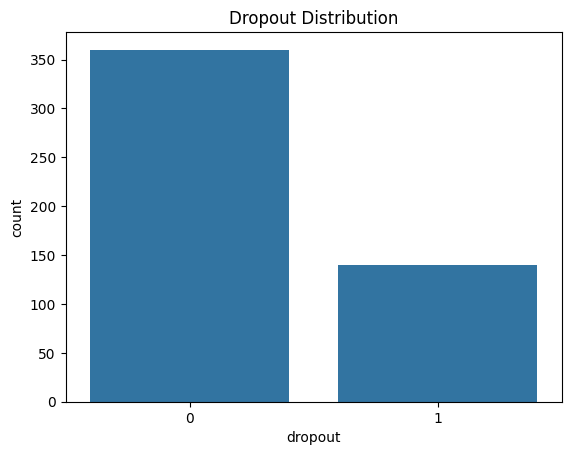

In [ ]:
#Exploratory Data Analysis (EDA)
# Dropout Distribution
sns.countplot(x='dropout', data=df)
plt.title('Dropout Distribution')
plt.show()


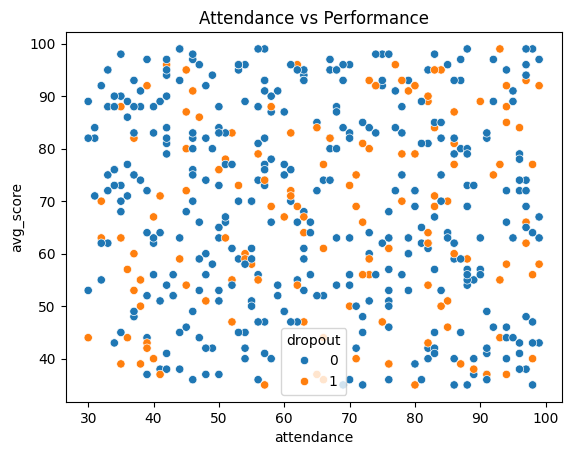

In [ ]:
#Attendance vs Performance
sns.scatterplot(x='attendance', y='avg_score', hue='dropout', data=df)
plt.title('Attendance vs Performance')
plt.show()


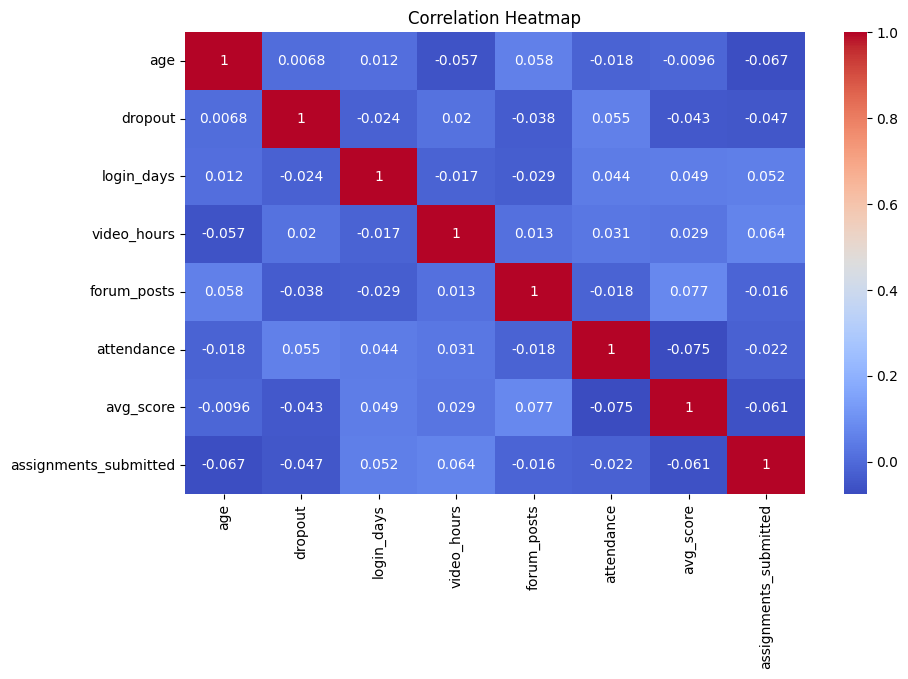

In [ ]:
# Correlation Heatmap
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
#Model Training
#Linear Regression to predict dropout
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

X = df[['login_days', 'video_hours', 'attendance', 'avg_score']]
y = df['dropout']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions = [1 if p > 0.5 else 0 for p in predictions]

accuracy_score(y_test, predictions)


0.74

In [ ]:
#Logistic Regression for better classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      1.00      0.85        74
           1       0.00      0.00      0.00        26

    accuracy                           0.74       100
   macro avg       0.37      0.50      0.43       100
weighted avg       0.55      0.74      0.63       100



c:\Users\Simran Taj\OneDrive\Desktop\STUDENT\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Simran Taj\OneDrive\Desktop\STUDENT\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Simran Taj\OneDrive\Desktop\STUDENT\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

In [ ]:
#Model Saving
import joblib

joblib.dump(model, "dropout_prediction_model.pkl")


['dropout_prediction_model.pkl']